In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%config InlineBackend.figure_format = 'retina'

In [2]:
RANDOM_SEED = 666

In [3]:
pd.set_option("display.max_columns", None)

## Airline Passenger Satisfaction

In [4]:
data = pd.read_csv("../data/airline_satisfaction/train.csv", index_col=0)
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
# Train a simple model using only numerical features
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [6]:
ignore_features = ["id"]
features = [
    column
    for column, series in data.items()
    if np.issubdtype(series.dtype, np.number) and column not in ignore_features
]
target = "satisfaction"

In [7]:
X = data[features]
# y is 0s and 1s
y = LabelEncoder().fit_transform(data[target])

In [8]:
X.shape

(103904, 18)

In [9]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [10]:
imputer = SimpleImputer()
X_trans = imputer.fit_transform(X)

In [11]:
model = LogisticRegression(random_state=RANDOM_SEED)
model = model.fit(X_trans, y)

/Users/erosenthal/.pyenv/versions/week4/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
imputer = SimpleImputer()

X_trans = imputer.fit_transform(scaler.fit_transform(X))

In [14]:
model = LogisticRegression(random_state=RANDOM_SEED)
model = model.fit(X_trans, y)

In [15]:
# predict_proba to get probabilities
y_pred_proba = model.predict_proba(X_trans)

In [16]:
# The output of predict_proba is N x C
# N -> number of samples
# C -> number of classes
print(y_pred_proba.shape)

(103904, 2)


In [17]:
y_pred_proba

array([[0.67456906, 0.32543094],
       [0.92099273, 0.07900727],
       [0.14732002, 0.85267998],
       ...,
       [0.78777509, 0.21222491],
       [0.87279147, 0.12720853],
       [0.99148607, 0.00851393]])

In [18]:
# predict gives classes.
# It assumes a default threshold of 0.5

In [19]:
y_pred = model.predict(X_trans)

In [20]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

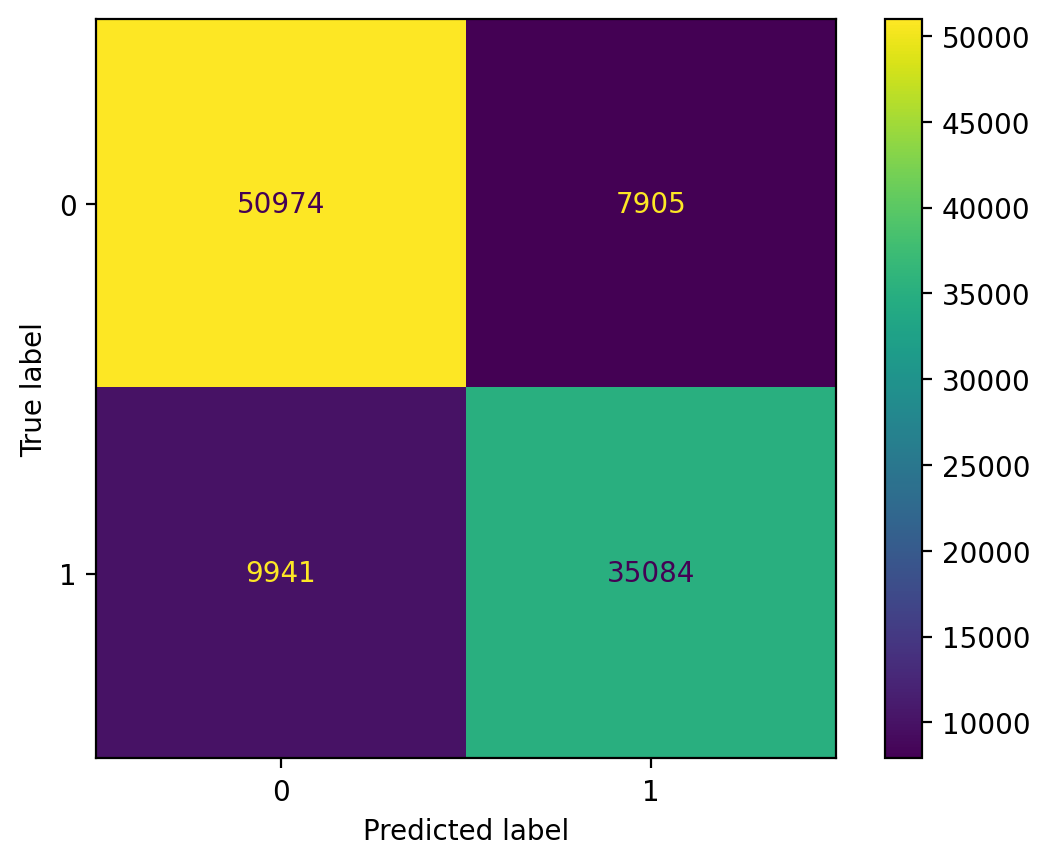

In [22]:
ax = ConfusionMatrixDisplay.from_predictions(y, y_pred)

In [23]:
from sklearn.metrics import classification_report

In [24]:
# Quick view of metrics:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85     58879
           1       0.82      0.78      0.80     45025

    accuracy                           0.83    103904
   macro avg       0.83      0.82      0.82    103904
weighted avg       0.83      0.83      0.83    103904



In [25]:
# Individual metrics available too
from sklearn.metrics import f1_score, precision_score, recall_score

In [26]:
for func in (precision_score, recall_score, f1_score):
    print(f"{func.__name__+':':20s} {func(y, y_pred):.4f}")

precision_score:     0.8161
recall_score:        0.7792
f1_score:            0.7972


#### The threshold is a choice!

In [27]:
threshold = 0.4

In [28]:
print(classification_report(y, y_pred_proba[:, 1] >= threshold))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83     58879
           1       0.76      0.83      0.79     45025

    accuracy                           0.81    103904
   macro avg       0.81      0.81      0.81    103904
weighted avg       0.82      0.81      0.81    103904



In [29]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

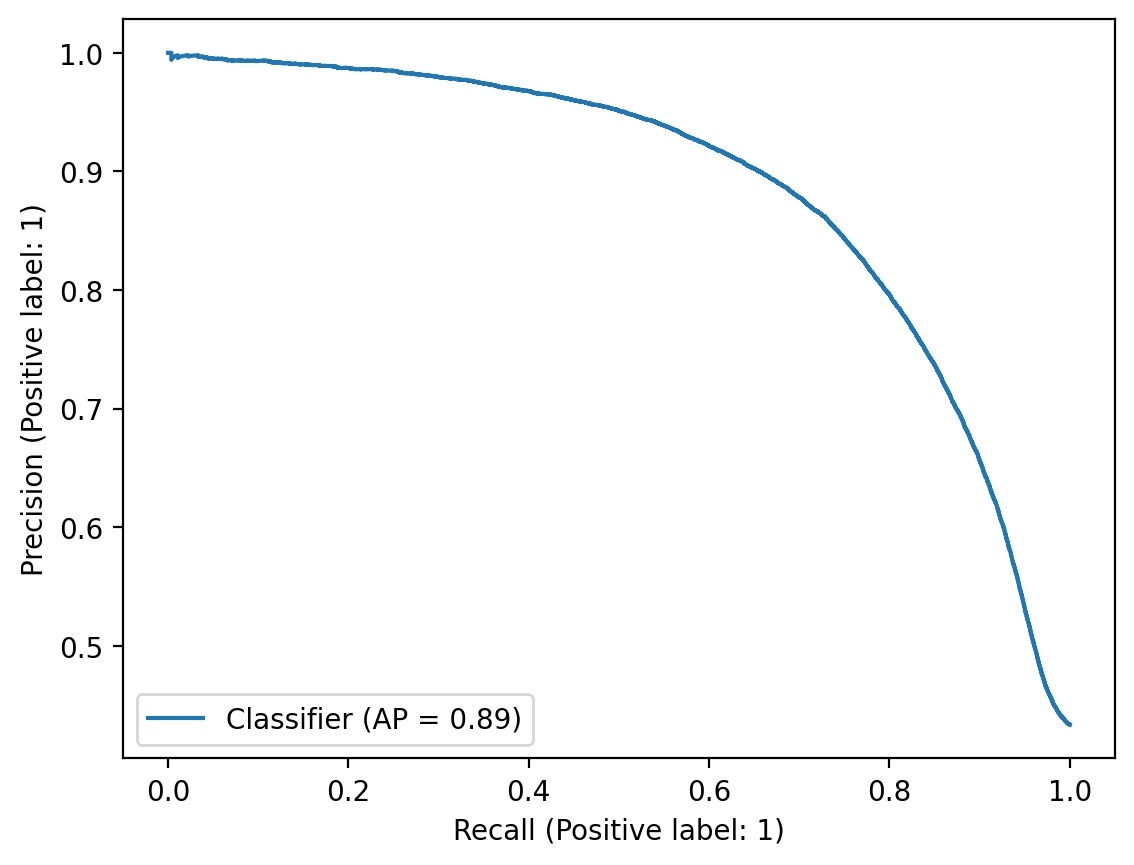

In [30]:
ax = PrecisionRecallDisplay.from_predictions(y, y_pred_proba[:, 1])

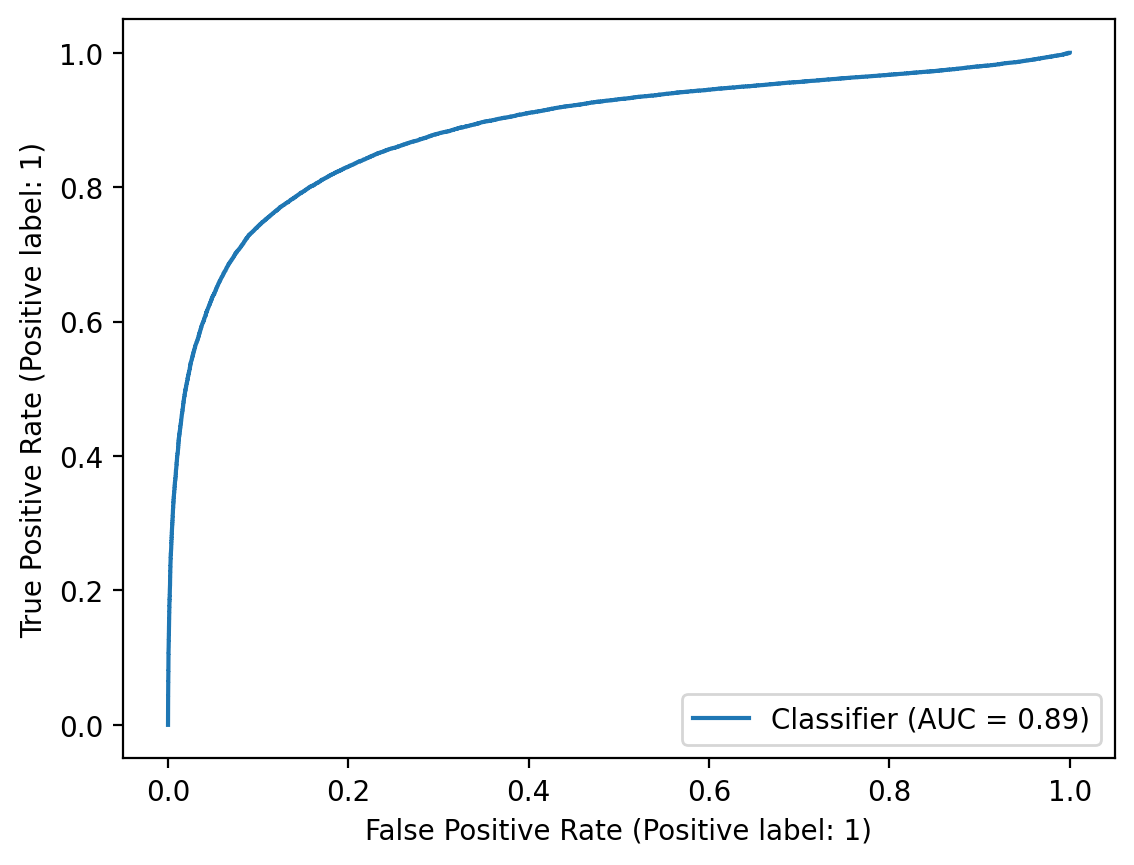

In [31]:
ax = RocCurveDisplay.from_predictions(y, y_pred_proba[:, 1])

## Global Speech Accent Recognition

In [32]:
data = pd.read_csv("../data/accent_recognition/train.csv")
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,language
0,8.118459,-2.784780,0.414908,0.907955,-7.995316,15.525385,-10.439900,5.001569,-1.512281,-2.719342,2.222301,-5.846886,US
1,-2.374189,-7.297245,7.349022,7.524122,-7.129271,11.292515,-13.649587,4.615975,-0.784158,-4.178449,1.320741,2.530421,ES
2,-0.791621,1.303788,-1.791229,6.227355,-9.602931,8.602848,-7.727415,6.436677,-0.055187,0.486530,1.698110,-1.761528,FR
3,-3.177167,-4.239308,1.106003,10.937736,-8.870120,6.314209,-9.932148,0.379124,-1.273991,-0.336232,5.219751,-5.748222,US
4,10.978152,1.643641,6.195087,1.265713,5.735026,9.046351,-7.799853,0.789758,-2.697877,-9.736504,4.329233,-4.248319,UK


In [33]:
features = [
    "X1",
    "X2",
    "X3",
    "X4",
    "X5",
    "X6",
    "X7",
    "X8",
    "X9",
    "X10",
    "X11",
    "X12",
]
target = "language"

In [34]:
X = data[features]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data[target])

In [35]:
y

array([5, 0, 1, ..., 5, 4, 0])

In [36]:
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)

In [37]:
model = LogisticRegression(random_state=RANDOM_SEED)
model.fit(X_trans, y)

LogisticRegression(random_state=666)

In [38]:
y_pred_proba = model.predict_proba(X_trans)

In [39]:
y_pred_proba.shape

(3960, 6)

In [40]:
y_pred_proba

array([[0.08989257, 0.08639566, 0.10888789, 0.10583605, 0.15820355,
        0.45078429],
       [0.10613857, 0.07561951, 0.09676669, 0.08965272, 0.13285342,
        0.4989691 ],
       [0.05713881, 0.08426621, 0.12270905, 0.10539714, 0.15628228,
        0.47420651],
       ...,
       [0.0611238 , 0.07141685, 0.1211123 , 0.06641206, 0.18448782,
        0.49544717],
       [0.10788566, 0.07904003, 0.10524137, 0.07102666, 0.14640408,
        0.49040219],
       [0.13507653, 0.07269598, 0.10206758, 0.0732913 , 0.16606306,
        0.45080555]])

In [41]:
y_pred = model.predict(X_trans)

In [42]:
y_pred

array([5, 5, 5, ..., 5, 5, 5])

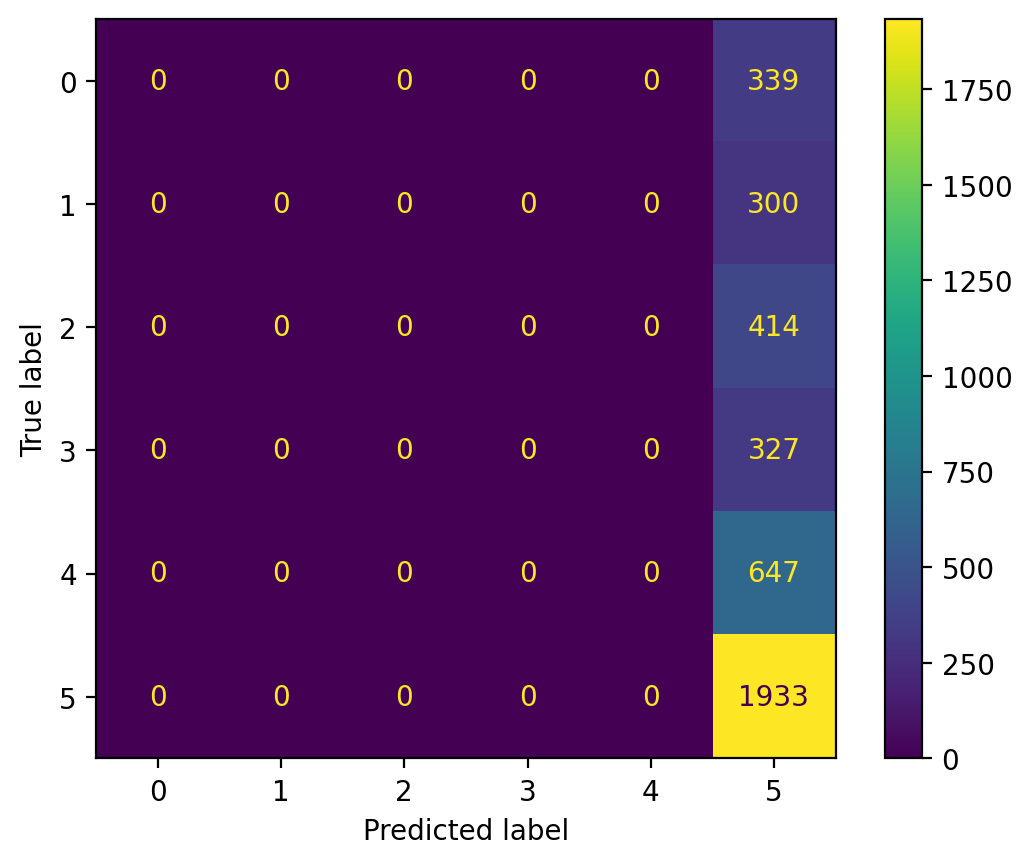

In [43]:
ConfusionMatrixDisplay.from_predictions(y, y_pred)

In [44]:
label_encoder.inverse_transform([5])

array(['US'], dtype=object)

In [45]:
data[target].value_counts()

US    1933
UK     647
GE     414
ES     339
IT     327
FR     300
Name: language, dtype: int64

In [46]:
model = LogisticRegression(class_weight="balanced", random_state=RANDOM_SEED)
model.fit(X_trans, y)

LogisticRegression(class_weight='balanced', random_state=666)

In [47]:
y_pred = model.predict(X_trans)

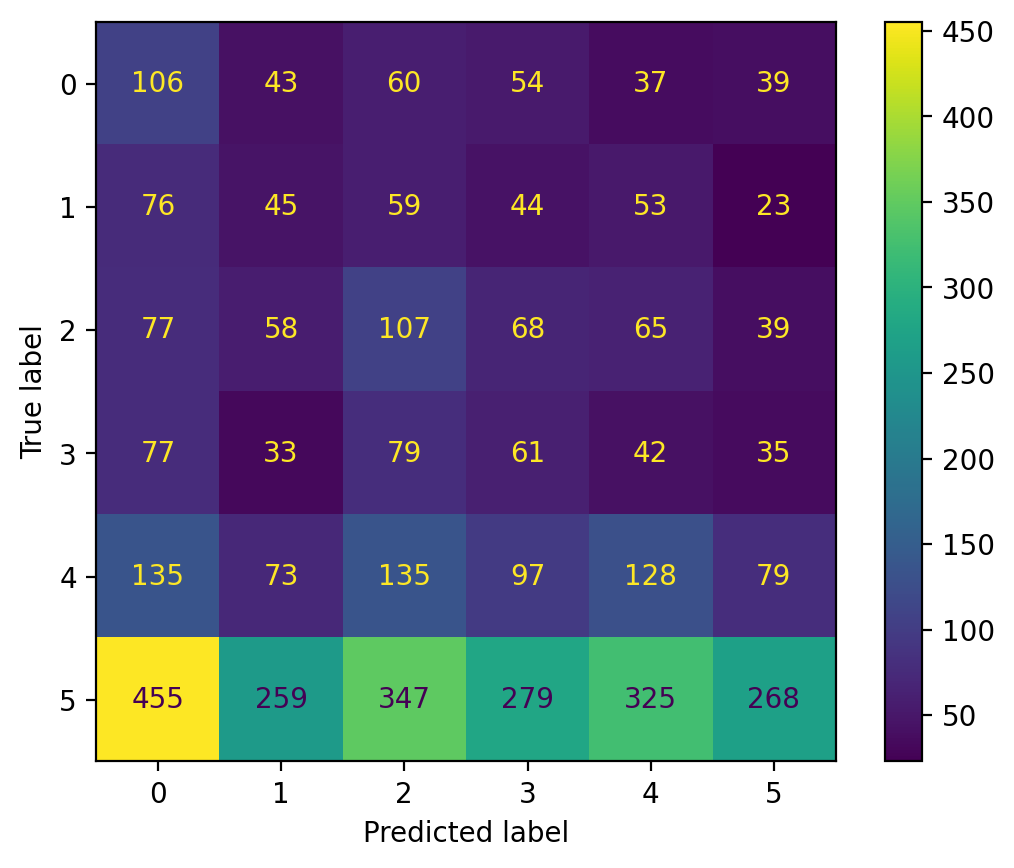

In [48]:
ax = ConfusionMatrixDisplay.from_predictions(y, y_pred)

In [49]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.11      0.31      0.17       339
           1       0.09      0.15      0.11       300
           2       0.14      0.26      0.18       414
           3       0.10      0.19      0.13       327
           4       0.20      0.20      0.20       647
           5       0.55      0.14      0.22      1933

    accuracy                           0.18      3960
   macro avg       0.20      0.21      0.17      3960
weighted avg       0.34      0.18      0.19      3960



In [50]:
for func in (precision_score, recall_score, f1_score):
    for avg in ("micro", "macro"):
        print(f"{func.__name__+f' ({avg}):':30s} {func(y, y_pred, average=avg):.4f}")

precision_score (micro):       0.1806
precision_score (macro):       0.1986
recall_score (micro):          0.1806
recall_score (macro):          0.2074
f1_score (micro):              0.1806
f1_score (macro):              0.1679


In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model = RandomForestClassifier(class_weight="balanced", random_state=RANDOM_SEED)
model.fit(X_trans, y)

RandomForestClassifier(class_weight='balanced', random_state=666)

In [53]:
y_pred = model.predict(X_trans)

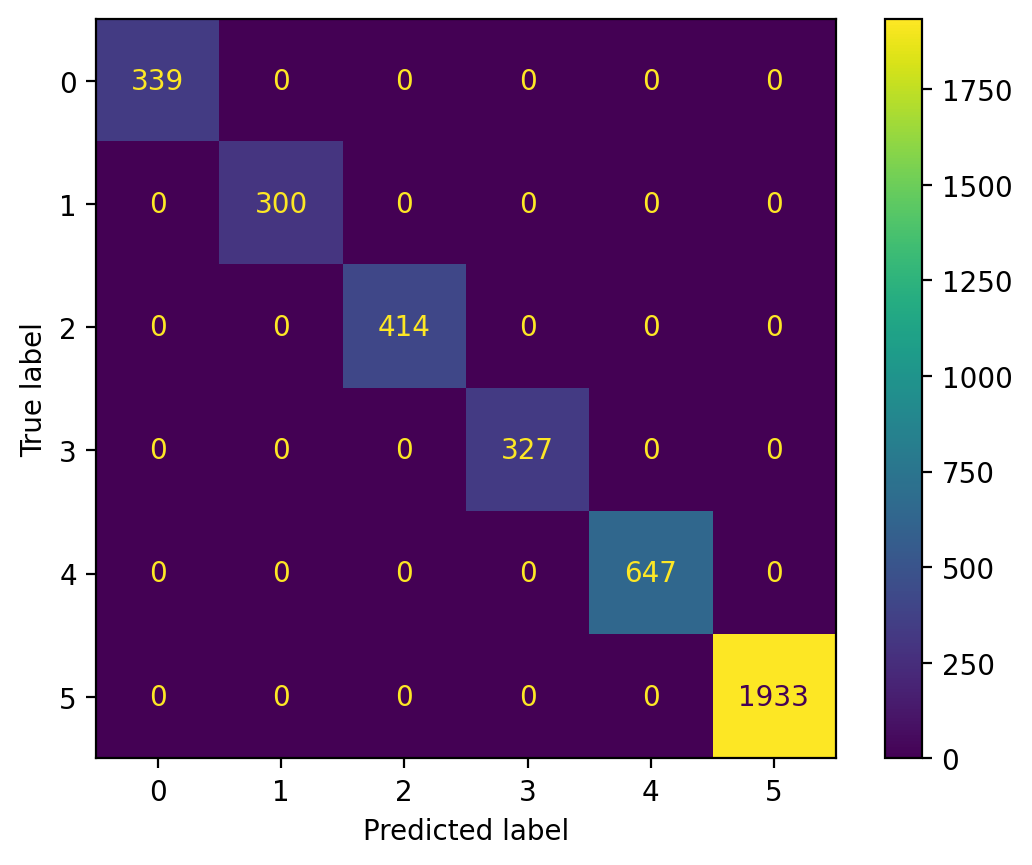

In [54]:
ax = ConfusionMatrixDisplay.from_predictions(y, y_pred)